## Importing Modules

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df=pd.read_csv('BlackFriday.csv')
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#Statistical Info
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,537577.0,1.002992e+06,1714.392695,1000001.0,1001495.0,1003031.0,1004417.0,1006040.0
Occupation,537577.0,8.082710e+00,6.524120,0.0,2.0,7.0,14.0,20.0
Marital_Status,537577.0,4.087973e-01,0.491612,0.0,0.0,0.0,1.0,1.0
Product_Category_1,537577.0,5.295546e+00,3.750701,1.0,1.0,5.0,8.0,18.0
Product_Category_2,370591.0,9.842144e+00,5.087259,2.0,5.0,9.0,15.0,18.0
Product_Category_3,164278.0,1.266984e+01,4.124341,3.0,9.0,14.0,16.0,18.0
Purchase,537577.0,9.333860e+03,4981.022133,185.0,5866.0,8062.0,12073.0,23961.0


In [4]:
## Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
# Find unique values
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

## EDA

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

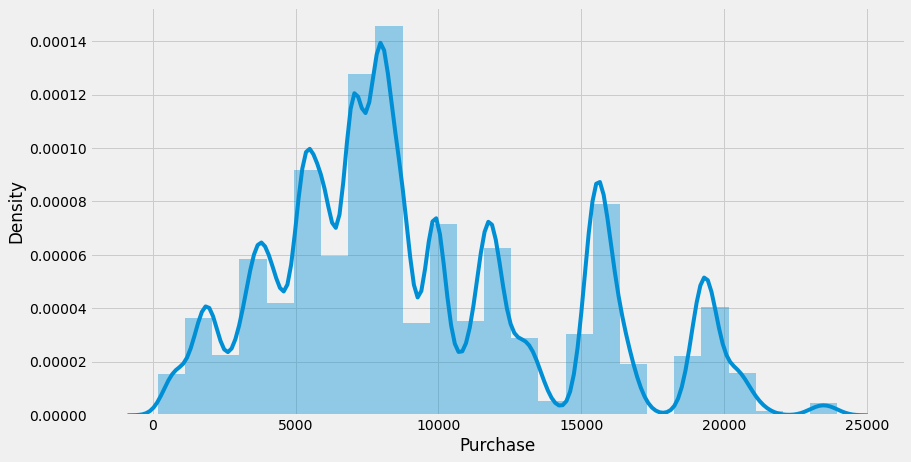

In [6]:
#displot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(df['Purchase'],bins=25)

<AxesSubplot:xlabel='Gender', ylabel='count'>

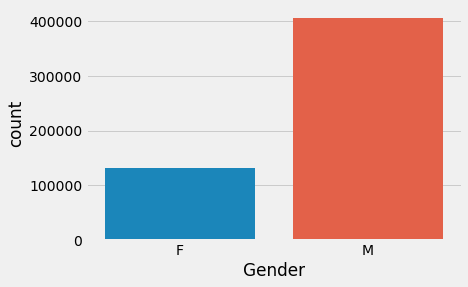

In [7]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

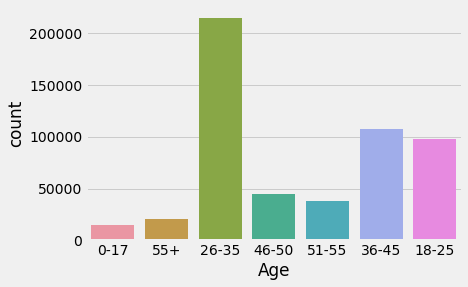

In [8]:
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

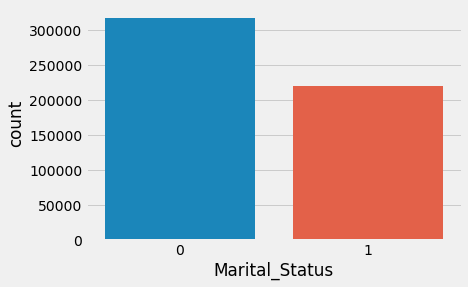

In [9]:
sns.countplot(df['Marital_Status'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

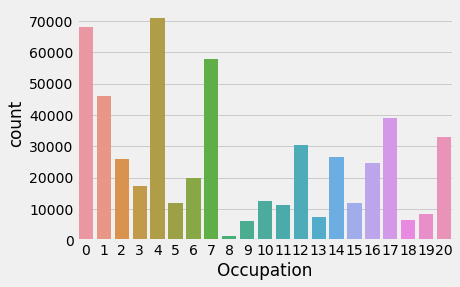

In [10]:
sns.countplot(df['Occupation'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

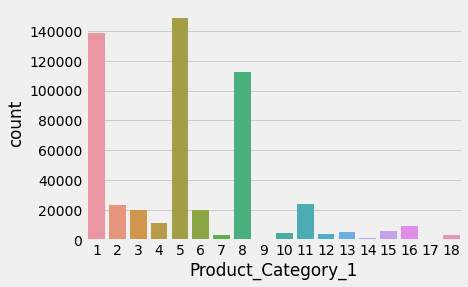

In [11]:
sns.countplot(df['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

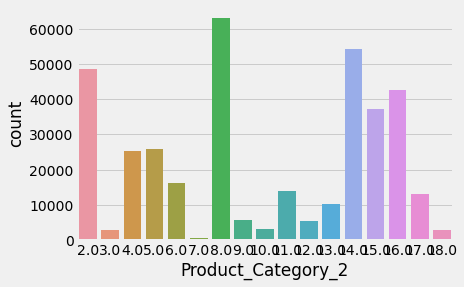

In [12]:
sns.countplot(df['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

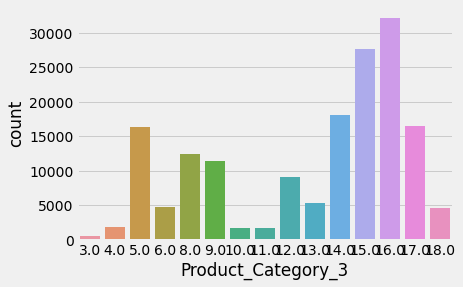

In [13]:
sns.countplot(df['Product_Category_3'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

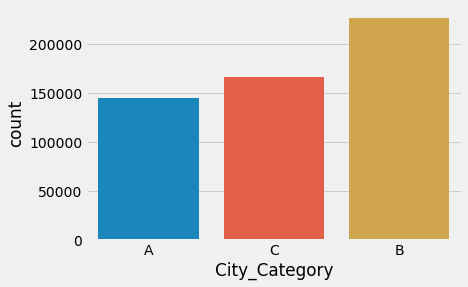

In [14]:
sns.countplot(df['City_Category'])

Text(0.5, 1.0, 'Occupation VS Purchases Analysis')

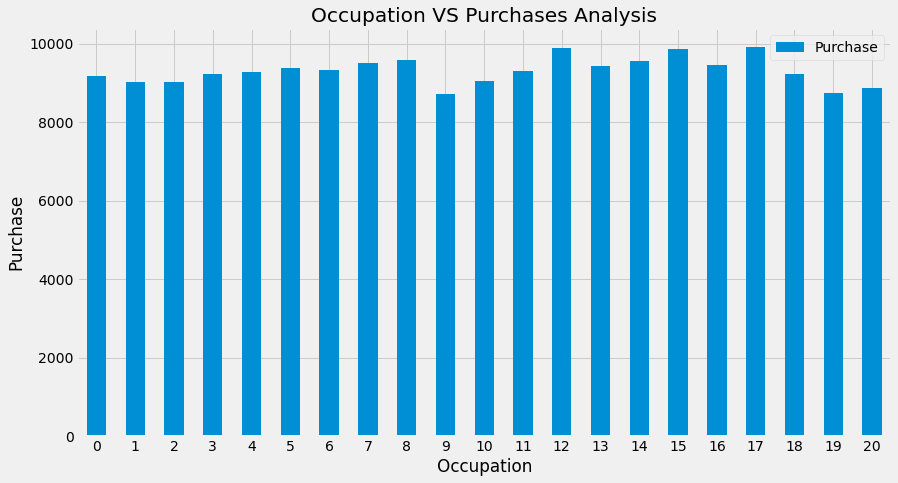

In [15]:
#Bivariate amnalysis
occupation_plot=df.pivot_table(index='Occupation',values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar',figsize=(13,7))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.title('Occupation VS Purchases Analysis')

Text(0.5, 1.0, 'Age VS Purchase Analysis')

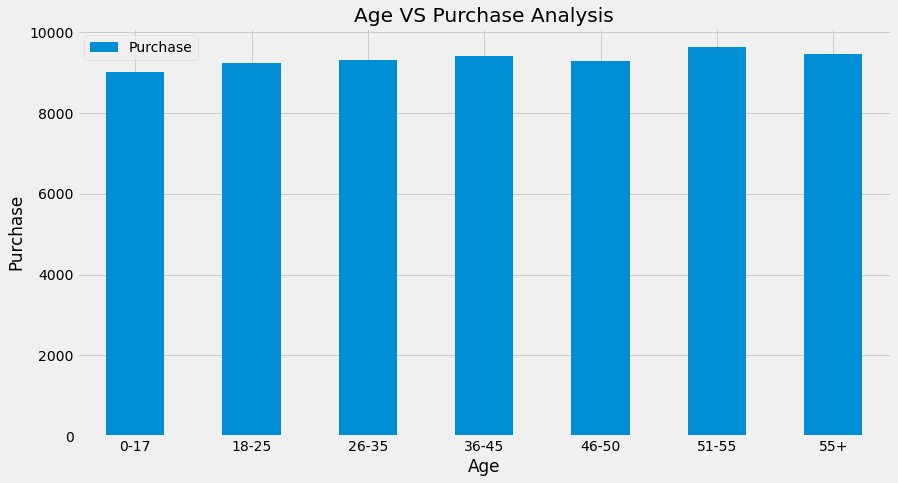

In [16]:
age_plot=df.pivot_table(index='Age',values='Purchase',aggfunc=np.mean)
age_plot.plot(kind='bar',figsize=(13,7))
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.title('Age VS Purchase Analysis')

Text(0.5, 1.0, 'Gender VS Purchase Analysis')

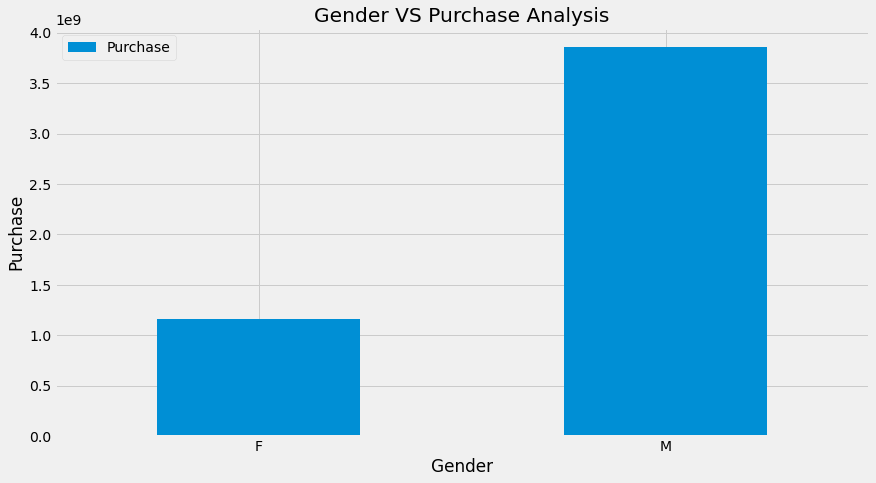

In [17]:
gender_plot=df.pivot_table(index='Gender',values='Purchase',aggfunc=np.sum)
gender_plot.plot(kind='bar',figsize=(13,7))
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.xticks(rotation=0)
plt.title('Gender VS Purchase Analysis')

## Preprocessing the dataset

In [18]:
# Check null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [19]:
df['Product_Category_2'].fillna(-2.0, inplace =True)

In [20]:
df['Product_Category_3'].fillna(-2.0, inplace =True)

In [21]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [22]:
# Encoding values using dictionary
gender_dict={'F':0,'M':1}
df['Gender']=df['Gender'].apply(lambda x:gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [23]:
#Label Encoding
cols = ['Age','City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for name in cols:
    df[name]=le.fit_transform(df[name])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


<AxesSubplot:>

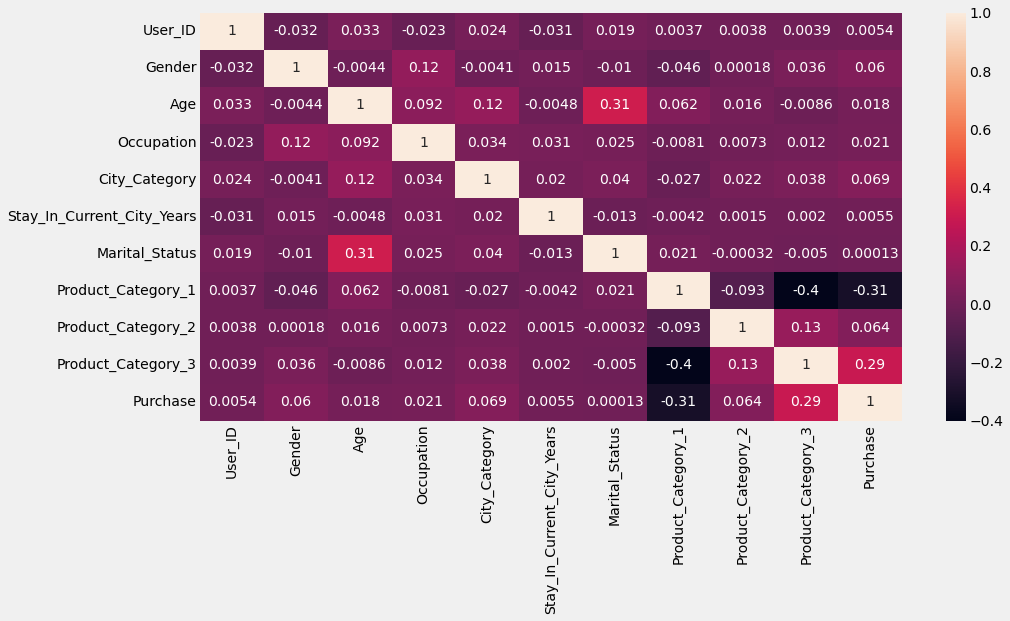

In [24]:
corr=df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True)

In [25]:
X=df.drop(columns=['User_ID','Product_ID','Purchase'])
y=df['Purchase']

## Input split

In [26]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model,x,y):
	x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
	model.fit(x_train,y_train)
	pred=model.predict(x_test)
	cv_score=cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
	cv_score=np.abs(np.mean(cv_score))
	print('Results')
	print('MSE:',np.sqrt(mean_squared_error(y_test,pred)))
	print('CV socre:',cv_score)

Results
MSE: 4633.530404000049
CV socre: 21422819.564116966


<AxesSubplot:title={'center':'Model Coefficients'}>

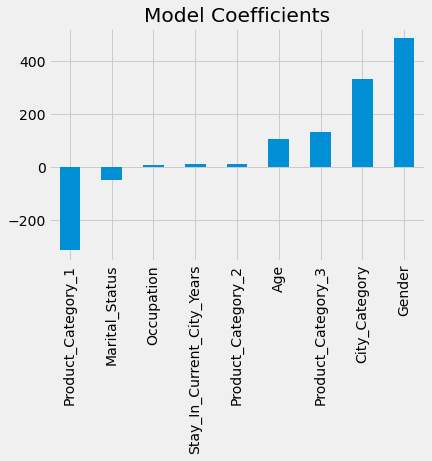

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
train(model,X,y)
coef=pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Results
MSE: 3061.011452325753
CV socre: 9338541.818334121


<AxesSubplot:title={'center':'Feature Importance'}>

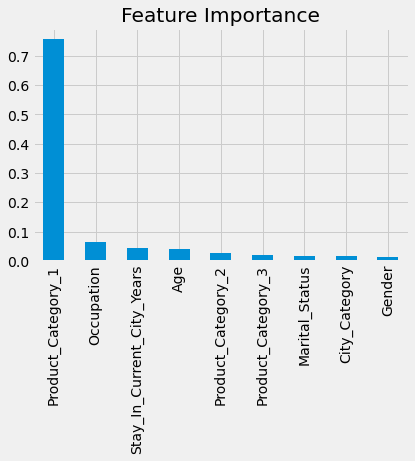

In [28]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [29]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

NameError: name 'Lasso' is not defined

Results
MSE: 3351.25780561867
CV socre: 11192765.569750782


<AxesSubplot:title={'center':'Feature Importance'}>

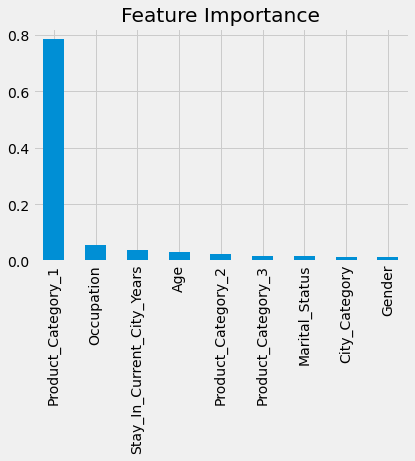

In [30]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Results
MSE: 3190.8242292829805
CV socre: 10141405.771380663


<AxesSubplot:title={'center':'Feature Importance'}>

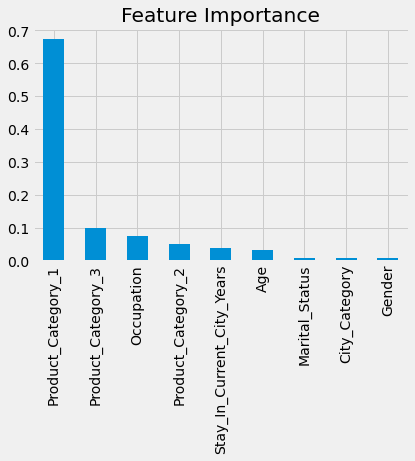

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")